# <center> <strong> Regressão Linear Múltipla<strong>

Guerreiros da missão: **Tsuru** (Júlia Guedes Almeida dos Santos), **Pólux** (Raquel de Godoy Vianna) e **Tiles** (Thalles José de Souza Cansi).

> Devagar se vai longe

## 🖼️ **Introdução**

<div style="text-align: justify;">
A regressão linear é um modelo preditivo que modela a relação entre uma variável dependente (target) e uma ou mais variáveis independentes (atributos), por meio da construção de uma <em>função linear</em> [Fórmula 1]. O objetivo desse modelo é minimizar a soma dos erros entre as previsões e os valores reais, utilizando um método conhecido como <em>método dos mínimos quadrados</em> [Fórmula 2].
</div>

O modelo utilizado neste notebook será o ``LinearRegression()`` (um modelo linear múltiplo — ou seja, que utiliza mais de uma variável independente) da biblioteca ``scikit-learn``.

$$
y = \beta_0 + \beta_1 x
$$
<center> [Fórmula 1: Fórmula da Regressão Linear Simples] </center>

Em relação à definição da regressão linear, temos que:
* $x$ é a variável independente, que representa o(s) atributo(s) do modelo linear.
* $\beta_0$ representa o intercepto, ou seja, o valor inicial da função linear (o valor de $y$ quando $x = 0$).
* $\beta_1$ é o coeficiente angular da função linear, representando a inclinação da reta (indicando quanto $y$ varia para cada unidade de $x$).
* $y$ é a variável dependente, que será o alvo da predição com o modelo.

Além disso, o modelo de regressão linear utiliza o <em>método dos mínimos quadrados</em> para ajustar os coeficientes. O objetivo desse método é minimizar a soma dos quadrados das diferenças entre os valores observados e os valores previstos, como descrito na equação a seguir:

$$
L(\beta_{0}, \beta_{1}) = \sum_{i=1}^{n} \left( y_{i} - \left( \beta_{0} + \beta_{1} x_{i} \right) \right)^2
$$
<center> [Fórmula 2: Método dos Mínimos Quadrados] </center>

No contexto do método dos mínimos quadrados:
* $L(\beta_0, \beta_1)$ é a *função de perda*, que quantifica o erro entre os valores observados e previstos.
* $\beta_0$ e $\beta_1$ são os coeficientes que minimizam a função de perda. Eles podem ser encontrados derivando essa função em relação a cada coeficiente.
* $n$ representa o número total de observações.

Com base nessas definições, o objetivo é ajustar os parâmetros $\beta_0$ e $\beta_1$ para que o modelo seja capaz de prever os valores da variável dependente $y$ de maneira precisa, minimizando o erro total (função de perda).

## 📚Importação de Bibliotecas

Importando as bibliotecas necessárias para a execução do código.

In [41]:
import pandas as pd

from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.metrics import root_mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

## ⚛️ Importação do dataset

Como os dados já foram separados e estão em um arquivo CSV, basta importá-los para o notebook.

In [42]:
df_treino_features = pd.read_csv('df_treino_features.csv')
df_treino_target = pd.read_csv('df_treino_target.csv')
df_teste_features = pd.read_csv('df_teste_features.csv')
df_teste_target = pd.read_csv('df_teste_target.csv')

### 🎯 Atributo ou Target?

Com o split realizado, antes de treinar o modelo apenas é preciso definir as **features** e o **target** que serão utilizados. Lembrando é necessário que esteja em uma única dimensão.

In [43]:
y_train = df_treino_target.values.ravel()
y_test = df_teste_target.values.ravel()

X_train = df_treino_features
X_test = df_teste_features

## 🍇 Regressão Linear Múltipla

Agora que os dados estão prontos, podemos começar a construir nosso primeiro modelo: a regressão linear múltipla. Este modelo nos permite ajustar uma linha (ou plano) que melhor se aproxima dos pontos de dados, minimizando o erro quadrático médio. A regressão linear múltipla é uma abordagem simples, mas eficiente, para prever uma variável dependente com base em múltiplas variáveis independentes.

In [45]:
pipeline_linear = Pipeline([
    ('scaler', StandardScaler()),
    ('model', LinearRegression())
])

pipeline_linear.fit(X_train, y_train)

y_pred_linear = pipeline_linear.predict(X_test)

mse_linear = root_mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

print(f"Erro quadrático médio (MSE) - Linear Regression: {mse_linear}")
print(f"Coeficiente de determinação (R²) - Linear Regression: {r2_linear}")

Erro quadrático médio (MSE) - Linear Regression: 17.40525516686125
Coeficiente de determinação (R²) - Linear Regression: 0.7362250387119037


## 🧙🏼‍♂️ SGD - Stochastic Gradient Descent

Além da regressão linear clássica, vamos experimentar uma abordagem diferente usando o Stochastic Gradient Descent (SGD). Este algoritmo é eficiente para grandes conjuntos de dados, pois atualiza os pesos do modelo a cada iteração, em vez de usar o conjunto de dados completo. Assim, ele é capaz de se ajustar mais rapidamente e com menor custo computacional em certos cenários.

In [52]:
pipeline_sgd = Pipeline([
    ('scaler', StandardScaler()),
    ('model', SGDRegressor(max_iter=1000, tol=1e-3))
])

pipeline_sgd.fit(X_train, y_train)

y_pred_sgd = pipeline_sgd.predict(X_test)

mse_sgd = root_mean_squared_error(y_test, y_pred_sgd)
r2_sgd = r2_score(y_test, y_pred_sgd)

print(f'Erro quadrático médio (MSE) - SGDRegressor: {mse_sgd}')
print(f'Coeficiente de determinação (R²) - SGDRegressor: {r2_sgd}')

Erro quadrático médio (MSE) - SGDRegressor: 17.645873542176354
Coeficiente de determinação (R²) - SGDRegressor: 0.7288815306417206


## 🛡️ Conclusão

Por fim, nesta seção, fazemos uma comparação direta entre os dois modelos testados: regressão linear múltipla e SGD. Avaliamos o desempenho de ambos em termos de erro (MSE) e capacidade de explicação da variância (R²). Com base nesses resultados, podemos concluir qual modelo é mais adequado para o nosso problema e sugerir melhorias para futuras implementações, como o uso de técnicas de regularização ou a otimização de hiperparâmetros.

In [53]:
print(f"Comparação dos Modelos:")
print(f"Regressão Linear Múltipla - MSE: {mse_linear}, R²: {r2_linear}")
print(f"SGD - MSE: {mse_sgd}, R²: {r2_sgd}")

Comparação dos Modelos:
Regressão Linear Múltipla - MSE: 17.40525516686125, R²: 0.7362250387119037
SGD - MSE: 17.645873542176354, R²: 0.7288815306417206


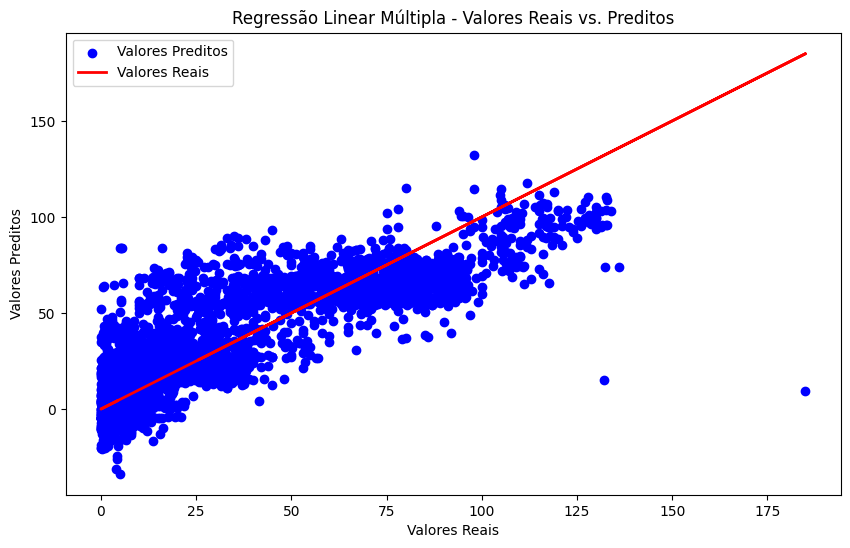

In [55]:
import matplotlib.pyplot as plt

# Comparação dos valores reais e preditos para Regressão Linear Múltipla
plt.figure(figsize=(10, 6))
plt.scatter(df_teste_target, y_pred_linear, color='blue', label='Valores Preditos')
plt.plot(df_teste_target, df_teste_target, color='red', label='Valores Reais', linewidth=2)
plt.title('Regressão Linear Múltipla - Valores Reais vs. Preditos')
plt.xlabel('Valores Reais')
plt.ylabel('Valores Preditos')
plt.legend()
plt.show()


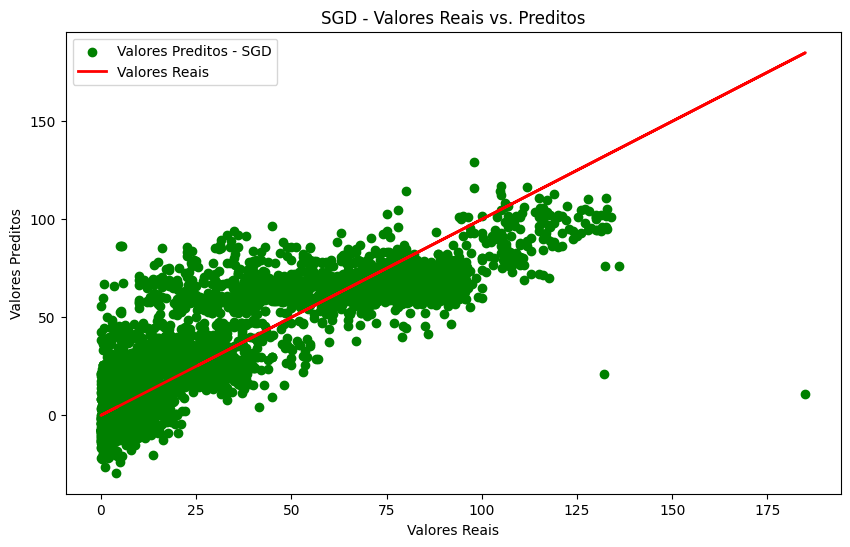

In [56]:
# Comparação dos valores reais e preditos para o SGD
plt.figure(figsize=(10, 6))
plt.scatter(df_teste_target, y_pred_sgd, color='green', label='Valores Preditos - SGD')
plt.plot(df_teste_target, df_teste_target, color='red', label='Valores Reais', linewidth=2)
plt.title('SGD - Valores Reais vs. Preditos')
plt.xlabel('Valores Reais')
plt.ylabel('Valores Preditos')
plt.legend()
plt.show()
